**Predicting Survival on the Titanic: Logistic Regression Analysis using Seaborn dataset**

Accuracy: 0.7972027972027972

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



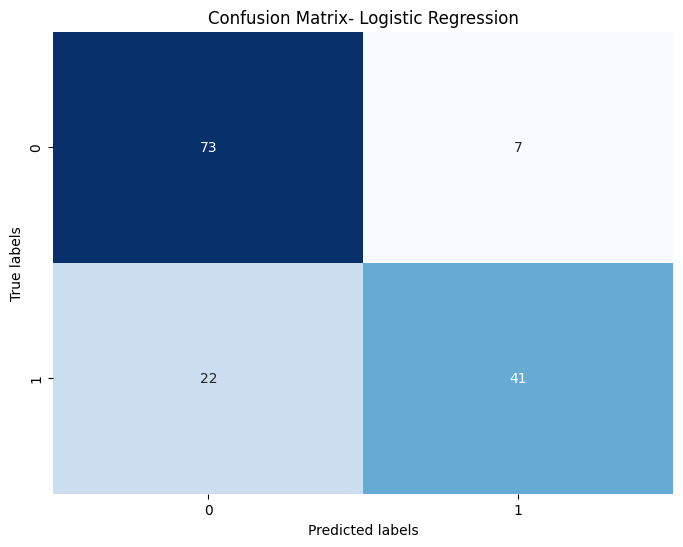

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# Load Titanic dataset
titanic_df = sns.load_dataset('titanic')
# Preprocess the data
# Drop irrelevant columns and handle missing values
titanic_df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'alone'],axis=1, inplace=True)
titanic_df.dropna(inplace=True)
# Convert categorical variables into dummy/indicator variables
# Encode 'sex' column
# Define features and target variable
titanic_df = pd.get_dummies(titanic_df, columns=['class', 'embarked'],drop_first=True)
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
# Predictions
y_pred = model.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix- Logistic Regression')
plt.show()

**Predicting Tips Based on Total Bill: Linear Regression Analysis using Seaborn dataset**

Mean Squared Error: 0.5688142529229536


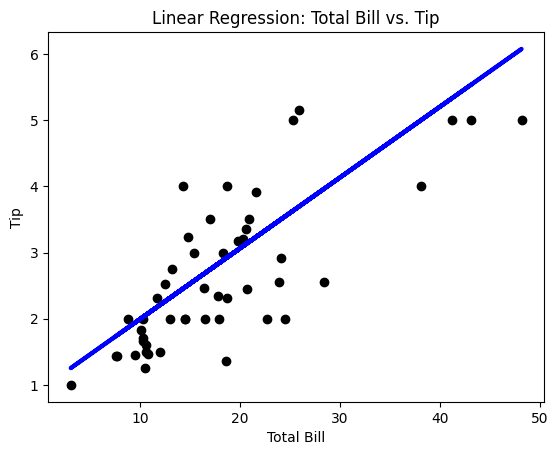

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
tips = sns.load_dataset("tips")
X = tips[['total_bill']]
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression: Total Bill vs. Tip')
plt.show()